In [1]:
from lib.rnn import *
from lib.layer_utils import *
from lib.grad_check import *
from lib.optim import *
from lib.train import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [11]:
%reload_ext autoreload

np.random.seed(231)

batch_size = 2
timesteps = 3
input_dim = 4
hidden_dim = 6
label_size = 4

labels = np.random.randint(label_size, size=(batch_size, timesteps))
features = np.random.randn(batch_size, timesteps, input_dim)
h0 = np.random.randn(batch_size, hidden_dim)

model = TestRNN(input_dim, hidden_dim, cell_type='rnn')
loss_func = temporal_softmax_CE_loss()

pred = model.forward(features, h0)

# You'll need this
mask = np.ones((batch_size, timesteps))

loss = loss_func.forward(pred, labels, mask)
dLoss = loss_func.backward()

dout, dh0 = model.backward(dLoss)

grads = model.grads

for param_name in sorted(grads):
    f = lambda _: loss_func.forward(model.forward(features, h0), labels, mask)
    param_grad_num = eval_numerical_gradient(f, model.params[param_name], verbose=False, h=1e-6)
    e = rel_error(param_grad_num, grads[param_name])
    print('%s relative error: %e' % (param_name, e))

vanilla_rnn_b relative error: 9.451394e-08
vanilla_rnn_wh relative error: 3.221744e-08
vanilla_rnn_wx relative error: 9.508480e-08


In [16]:
%reload_ext autoreload

N, D, H = 10, 20, 40
V = 4
T = 13

model = TestRNN(D, H, cell_type='lstm')
loss_func = temporal_softmax_CE_loss()

for k, v in model.params.items():
    model.params[k] = np.linspace(-1.4, 1.3, num=v.size).reshape(*v.shape)
model.assign_params()

features = np.linspace(-1.5, 0.3, num=(N * D * T)).reshape(N, T, D)
h0 = np.linspace(-1.5, 0.5, num=(N*H)).reshape(N, H)
labels = (np.arange(N * T) % V).reshape(N, T)

pred = model.forward(features, h0)

mask = np.ones((N, T))

loss = loss_func.forward(pred, labels, mask)
dLoss = loss_func.backward()

expected_loss = 49.2140256354

print('loss: ', loss)
print('expected loss: ', expected_loss)
print('difference: ', abs(loss - expected_loss))

loss:  49.21402563544293
expected loss:  49.2140256354
difference:  4.293099209462525e-11


In [17]:
%reload_ext autoreload

input_file = open("data/alice.txt", "r" ,encoding="utf8")
input_text = input_file.readlines()
input_text = ''.join(input_text)

In [18]:
%reload_ext autoreload

import re

text = re.split(' |\n',input_text.lower())  # all words are converted into lower case
outputSize = len(text)
word_list = list(set(text))
dataSize = len(word_list)
output = np.zeros(outputSize)
for i in range(0, outputSize):
    index = np.where(np.asarray(word_list) == text[i])
    output[i] = index[0]
data = output.astype(np.int)
gt_labels = data[1:]
input_data = data[:-1]

print('Input text size: %s' % outputSize)
print('Input word number: %s' % dataSize)

Input text size: 2170
Input word number: 778


In [21]:
%reload_ext autoreload

D = 10  # input dimension
H = 35  # hidden space dimension
T = 15  # timesteps
N = 10  # batch size
max_epoch = 50  # max epoch size

loss_func = temporal_softmax_CE_loss()
# you can change the cell_type between 'rnn' and 'lstm'.
model = LanguageModelRNN(dataSize, D, H, cell_type='rnn')
optimizer = Adam(model, 5e-4)

data = {'data_train': input_data, 'labels_train': gt_labels}

results = train_net(data, model, loss_func, optimizer, timesteps=T, batch_size=N, max_epochs=max_epoch, verbose=True)

(Iteration 1 / 10800) loss: 99.83724862791347
best performance 3.503918856615952%
(Epoch 1 / 50) Training Accuracy: 0.03503918856615952
best performance 6.131857999077916%
(Epoch 2 / 50) Training Accuracy: 0.06131857999077916
(Iteration 501 / 10800) loss: 81.20808764144581
best performance 6.8234209313047485%
(Epoch 3 / 50) Training Accuracy: 0.06823420931304748
best performance 7.699400645458737%
(Epoch 4 / 50) Training Accuracy: 0.07699400645458737
(Iteration 1001 / 10800) loss: 70.96744336632172
best performance 10.650069156293222%
(Epoch 5 / 50) Training Accuracy: 0.10650069156293222
best performance 12.586445366528354%
(Epoch 6 / 50) Training Accuracy: 0.12586445366528354
(Iteration 1501 / 10800) loss: 64.28956507096304
best performance 15.952051636698938%
(Epoch 7 / 50) Training Accuracy: 0.15952051636698938
best performance 19.13324112494237%
(Epoch 8 / 50) Training Accuracy: 0.19133241124942368
best performance 21.761180267404335%
(Epoch 9 / 50) Training Accuracy: 0.21761180267

Simply run the following code block to check the loss and accuracy curve. (We expect training accuracy to be >80%, you can change all parameters above except `T` to try to improve your training performance. The higher your performance, the better your text samples below will get.)

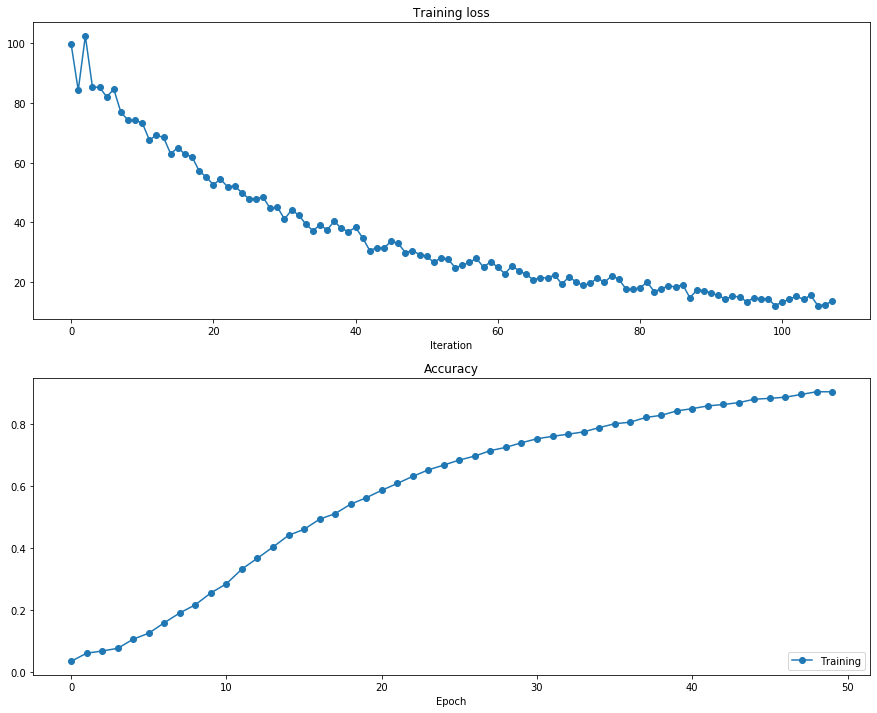

In [22]:
%reload_ext autoreload

opt_params, loss_hist, train_acc_hist = results

# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100]  # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)

plt.show()

Now you can generate text using the trained model. You can start from a specific word in the original text, such as `she`. (We expect the text to not be too repetitive, i.e. not repeating the same three words over and over. See an example of an acceptable sample below.)

> she was dozing off, and book-shelves; here and she tried to curtsey as she spoke--fancy curtseying as you’re falling through the little door into a dreamy sort of way, ‘do cats eat bats? do cats eat bats?’ and sometimes,

In [23]:
%reload_ext autoreload

# you can change the generated text length below.
text_length = 40

idx = 0
# you also can start from specific word. 
# since the words are all converted into lower case
idx = int(np.where(np.asarray(word_list) == 'She'.lower())[0])

# sample from the trained model
words = model.sample(idx, text_length-1)

# convert indices into words
output = [word_list[i] for i in words]
print(' '.join(output))

she was now only ten inches high, and she jumped up on to her feet in a moment: she found herself falling down a very deep well.  either the well was very deep, or thought another moment down went
